In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flats_cleaned.csv')
df.head()

,price,district,rooms,floor,metro,total_area,kitchen_area,floor_total
0,26000,Солом'янський,2,14.0,1,60.0,15.0,25.0
1,95750,Печерський,3,10.0,1,131.0,15.0,25.0
2,57450,Печерський,2,2.0,1,87.0,17.0,23.0
3,8000,Дарницький,1,3.0,1,40.0,9.0,16.0
4,15000,Дарницький,1,15.0,1,38.0,16.0,25.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13708 non-null  int64  
 1   district      13708 non-null  object 
 2   rooms         13708 non-null  int64  
 3   floor         13708 non-null  float64
 4   metro         13708 non-null  int64  
 5   total_area    13708 non-null  float64
 6   kitchen_area  13465 non-null  float64
 7   floor_total   13566 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 856.9+ KB


## Summary statistics for numeric features

In [38]:
df.describe()

,price,rooms,floor,metro,total_area,kitchen_area,floor_total
count,1.521100e+04,15211.000000,15211.000000,15211.000000,15211.000000,14965.000000,15061.000000
mean,3.823504e+04,2.209914,9.041549,0.400434,80.515758,15.974959,16.200186
std,1.098170e+05,1.041567,6.429815,0.490002,57.404154,10.534743,8.221015
min,9.990000e+02,1.000000,1.000000,0.000000,9.000000,1.000000,1.000000
25%,1.300000e+04,1.000000,4.000000,0.000000,46.000000,9.000000,9.000000
50%,2.290200e+04,2.000000,7.000000,0.000000,63.000000,14.000000,16.000000
75%,4.580300e+04,3.000000,13.000000,1.000000,98.000000,20.000000,24.000000
max,1.129850e+07,6.000000,53.000000,1.000000,1800.000000,210.000000,48.000000


There are some big values in price, total_area and kitchen_area, that looks like mistakes. Also, max value in floor_total column is 48, but in column floor max value is 53.

<Axes: >

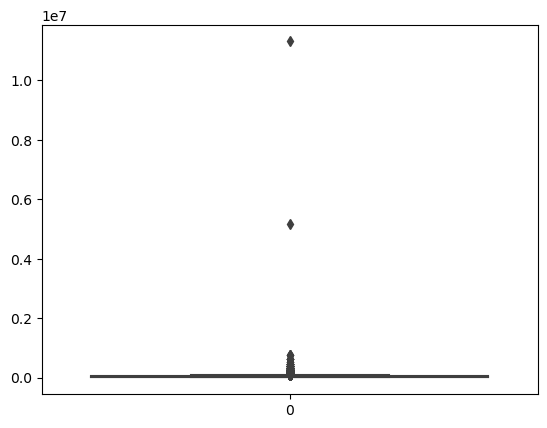

In [39]:
sns.boxplot(df.price)

<Axes: >

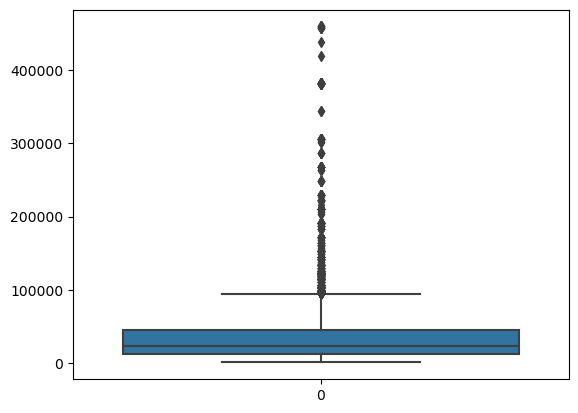

In [40]:
df = df[df.price<500000]
sns.boxplot(df.price)

<Axes: title={'center': 'price'}>

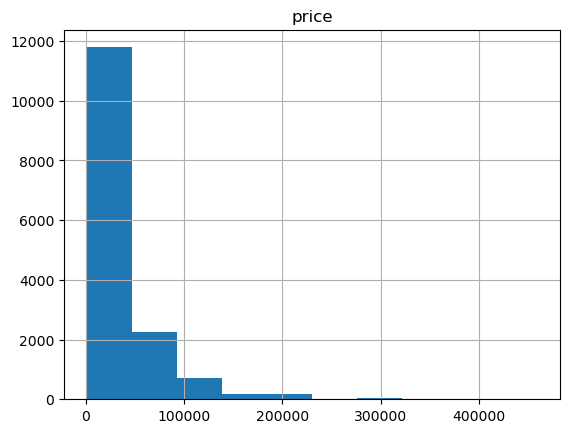

In [41]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

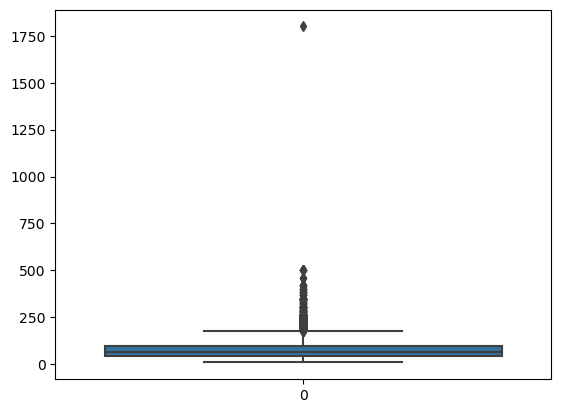

In [42]:
sns.boxplot(df.total_area)

<Axes: >

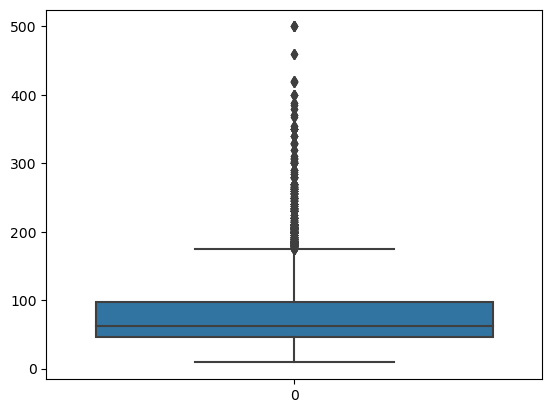

In [43]:
df = df[df.total_area <600]
sns.boxplot(df.total_area)

<Axes: >

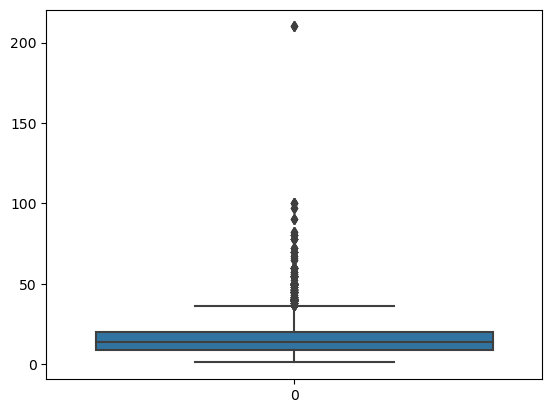

In [44]:
sns.boxplot(df.kitchen_area)

<Axes: >

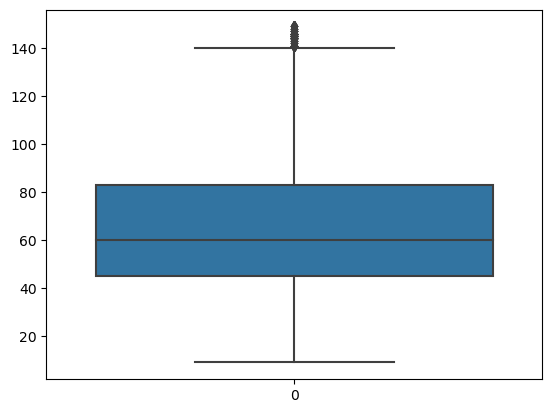

In [45]:
df = df[df.total_area <150]
sns.boxplot(df.total_area)

In [46]:
df[df.floor >48]

,price,district,rooms,floor,metro,total_area,kitchen_area,floor_total
8412,61280,Печерський,3,53.0,0,125.0,20.0,5.0


In [47]:
df.drop(8412, inplace=True)
df.reset_index(inplace=True, drop=True)

In [48]:
categorical = ['district', 'metro']
numerical = ['rooms', 'floor', 'total_area', 'kitchen_area', 'floor_total']

### Categorical features

Text(0.5, 1.0, 'Number of flats by district')

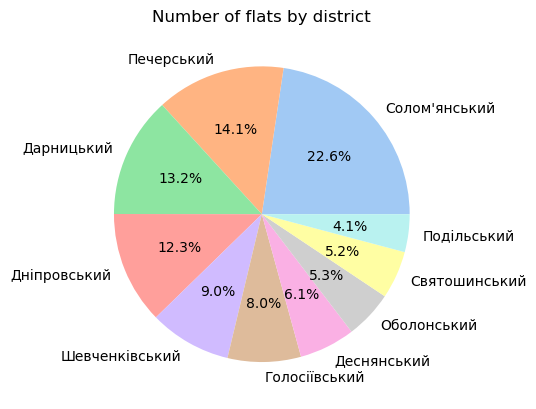

In [63]:
colors = sns.color_palette('pastel')[0:10]
plt.pie(x =df.district.value_counts(), labels=df.district.unique(), colors =colors,  autopct='%1.1f%%')

plt.title("Number of flats by district")

Text(0.5, 1.0, 'Number of flats by metro')

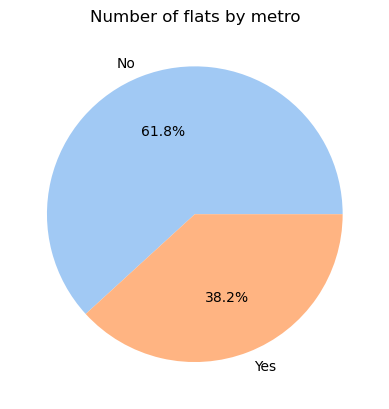

In [120]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(x =df.metro.value_counts(), labels=["No", "Yes"], colors =colors,  autopct='%1.1f%%')

plt.title("Number of flats by metro")

### Numerical features

Text(0.5, 1.0, 'Number of flats by rooms amount')

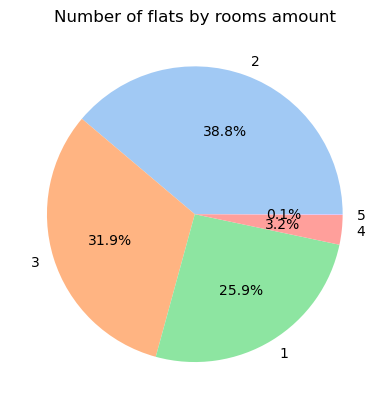

In [72]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(x =df.rooms.value_counts(), labels=df.rooms.unique(), colors =colors,  autopct='%1.1f%%')

plt.title("Number of flats by rooms amount")

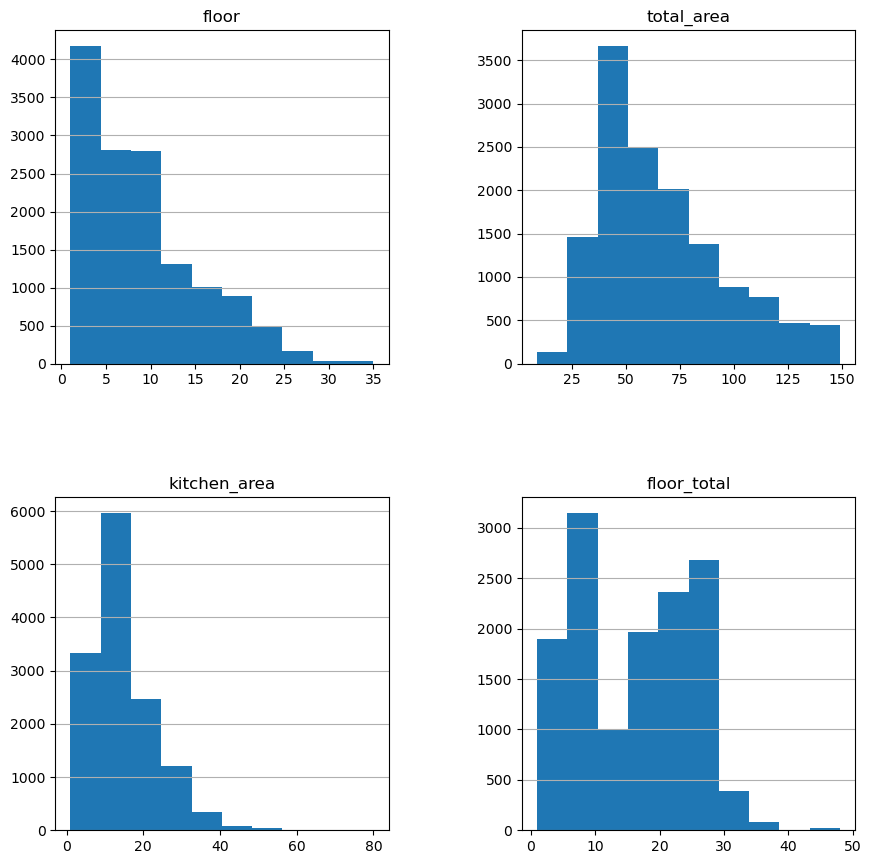

In [68]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(1, len(numerical)):
    plt.subplot(2, 2, i)
    plt.title(numerical[i])
    df[numerical[i]].hist()
    
    plt.grid(axis='x')

## Features dependencies

In [88]:
order = df.groupby(by='district').price.median().sort_values(ascending=False)
order.index

Index(['Печерський', 'Шевченківський', 'Голосіївський', 'Подільський',
       'Дарницький', 'Солом'янський', 'Оболонський', 'Дніпровський',
       'Святошинський', 'Деснянський'],
      dtype='object', name='district')

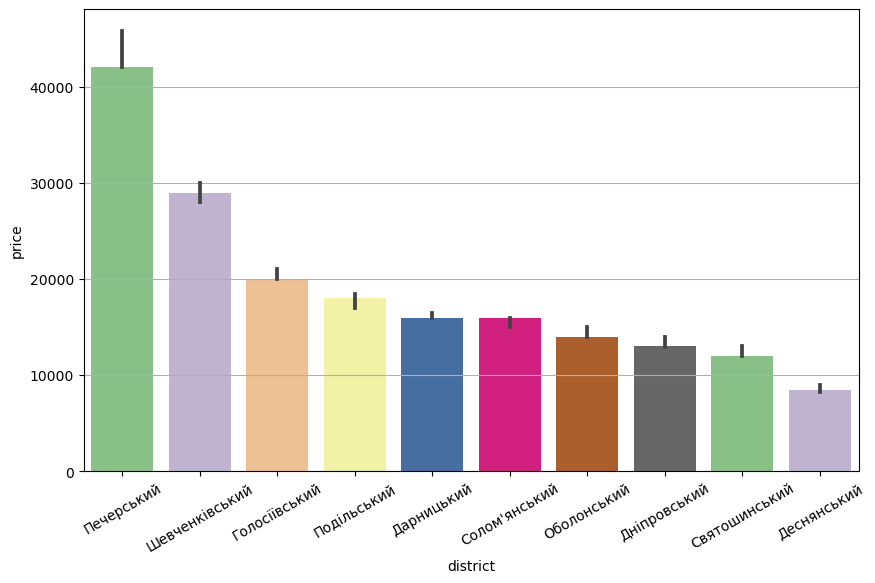

In [90]:
order = df.groupby(by='district').price.median().sort_values(ascending=False)

plt.figure(figsize = (10, 6))
g = sns.barplot(x='district', y='price', estimator=np.median, data=df, order = order.index, palette='Accent')
plt.grid(axis='y')
ticks = plt.xticks(rotation=30)

<Axes: xlabel='metro', ylabel='price'>

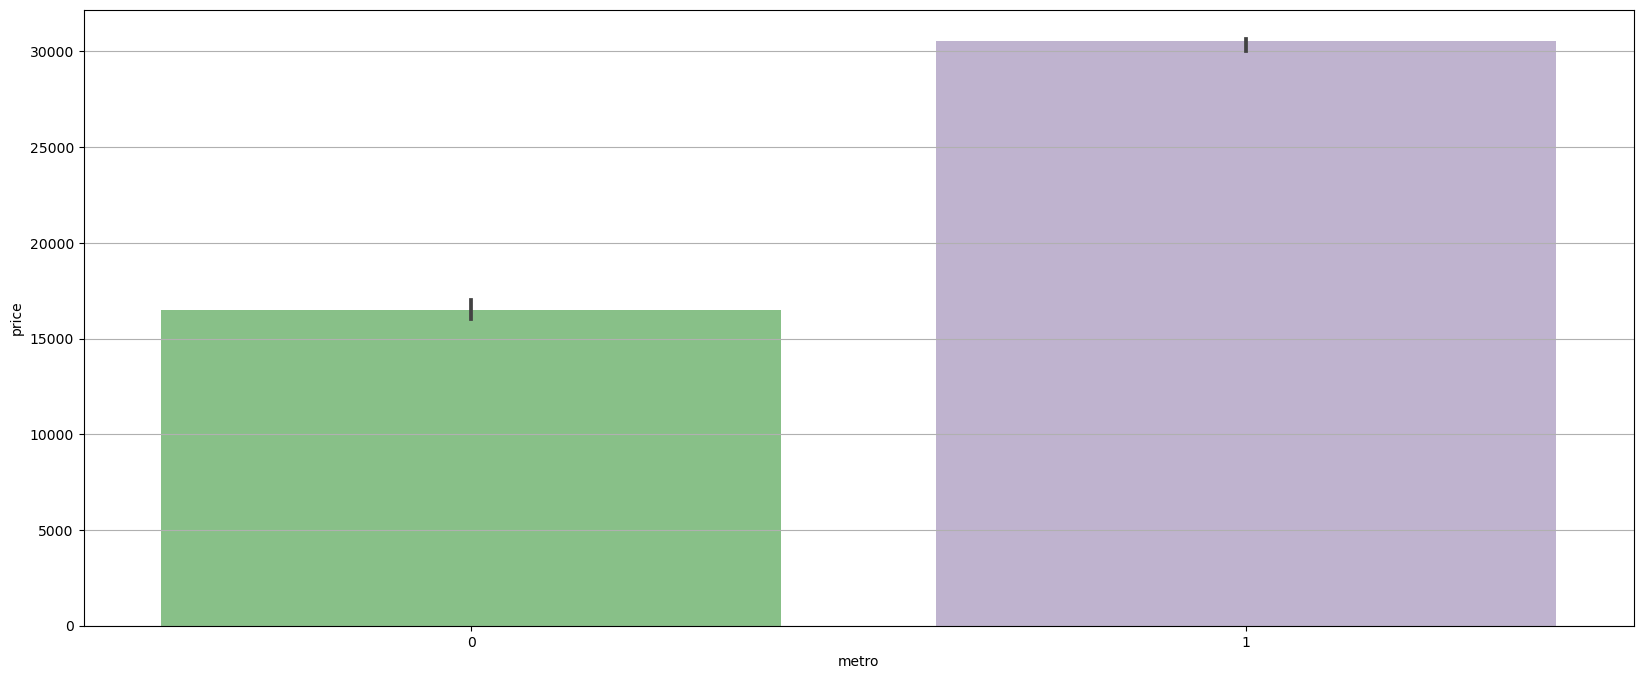

In [122]:
plt.figure(figsize=(20, 8))
plt.grid(axis='y')
sns.barplot(x='metro', y= 'price', data=df, estimator=np.median, palette='Accent')

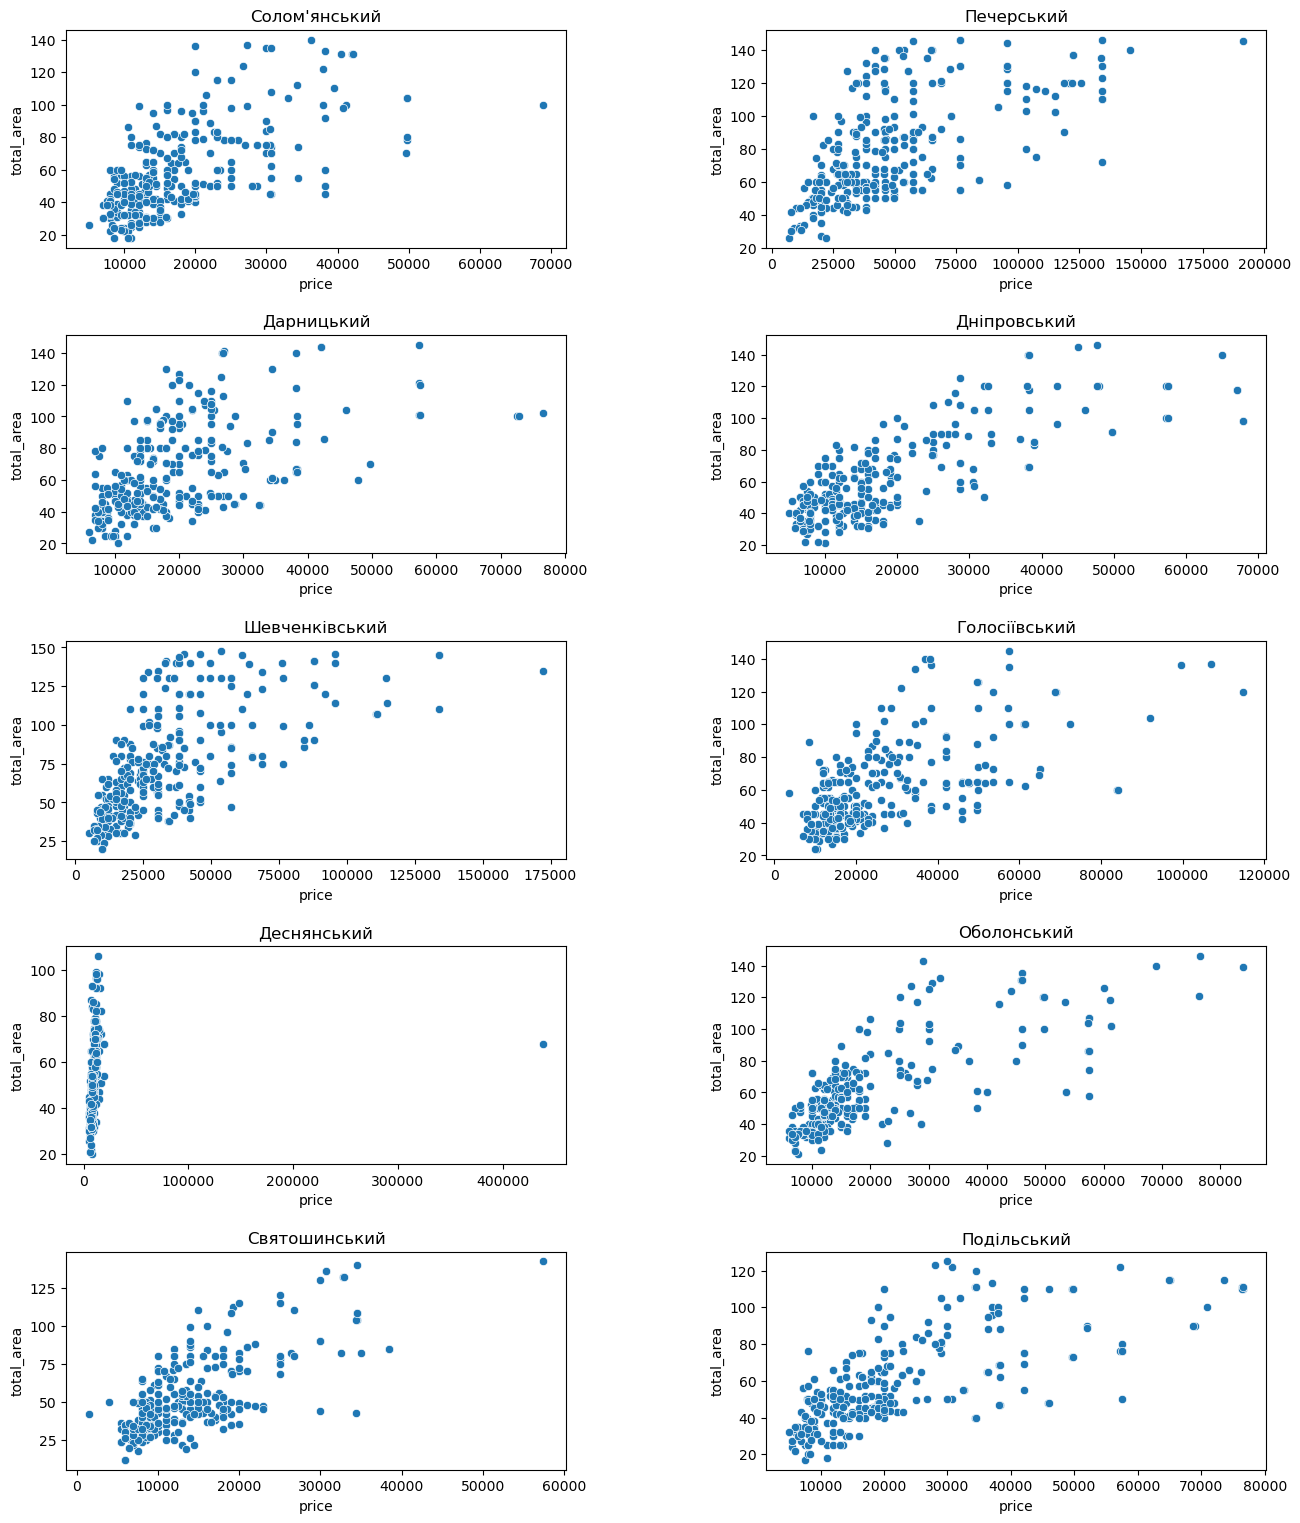

In [118]:
districts = df.district.unique()
plt.figure(figsize=(15, 18))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(districts)):
    plt.subplot(5, 2, i+1)
    plt.title(districts[i])
    sns.scatterplot(x='price', y ='total_area', data = df[df.district==districts[i]].sample(300))


<Axes: xlabel='rooms', ylabel='price'>

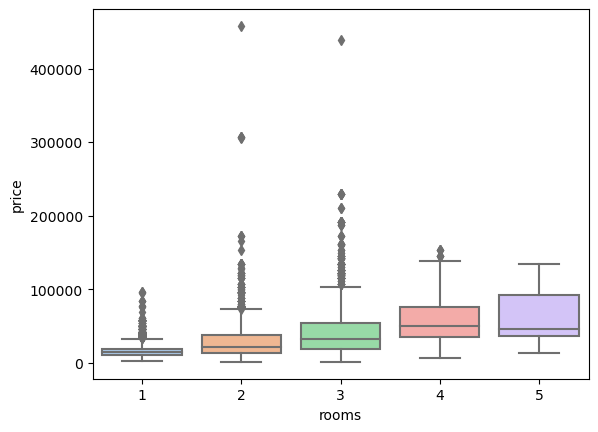

In [124]:
sns.boxplot(x='rooms', y='price', palette='pastel', data=df)

### Correlation

<Axes: >

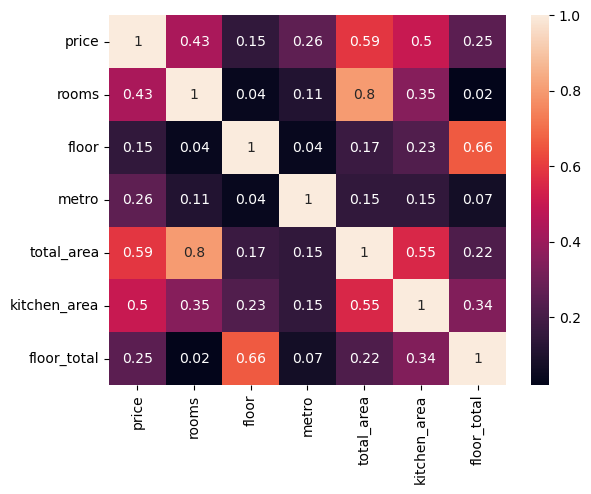

In [126]:
corr_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)